# Breast Cancer Diagnosis Using Machine Learning


## Project Topic and Goal:

**Project Topic:** This project applies supervised machine learning techniques to diagnose breast cancer, using patient data to classify tumors as malignant or benign through Logistic Regression, Decision Tree, Random Forest, and SVM algorithms.

**Project Goal:** To develop accurate classification models for early breast cancer detection and identify the most influential diagnostic features that can help improve clinical decision-making.

## Data

**Data Source:** The project utilizes the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle, which contains features extracted from digitized images of breast mass FNA biopsies and is publicly available for research purposes.
Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

**Data Description:**

The dataset contains 569 samples (rows) and 33 features (columns), including the target variable `diagnosis`, which indicates whether the tumor is malignant (M) or benign (B). The features are numerical values computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image. Here’s a detailed description:

**Target Variable:**

* `diagnosis`: The target variable indicating the diagnosis of the breast mass. It is a categorical variable with two possible values:
    * M: Malignant (indicating the presence of cancer)
    * B: Benign (indicating non-cancerous)

**Features:**

The dataset includes 30 numeric features, which are further grouped into three categories based on the type of measurement:

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Loading and Previewing Data
1. The dataset is imported into a pandas DataFrame using pd.read_csv(), creating a structured format that facilitates analysis.
2. data.head() displays the first five rows, giving an initial glimpse into the dataset's structure and contents.

In [122]:
# Load the dataset
df = pd.read_csv("breast_cancer_data.csv", index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA and Cleaning

## Dataset Dimensions
- `df.shape` provides the number of rows and columns, which helps in understanding the dataset's size.

## Missing Values
- `df.isnull().sum()` checks for missing values in each column.  
- Identifying missing values is crucial as they can affect analysis and model performance.

## Data Types and Memory Usage
- `df.info()` displays the data types of each column and memory usage.  
- Knowing data types is important for processing and ensuring that operations on the data are appropriate.

In [176]:
df.shape

(569, 31)

In [123]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [125]:
df.groupby('diagnosis').count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,0


We are dropping "Unnamed: 32" column as it only contain NA values.

In [126]:
df.drop(["Unnamed: 32"],axis=1, inplace=True)

df = df.dropna()

df = df.drop_duplicates()

In [129]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

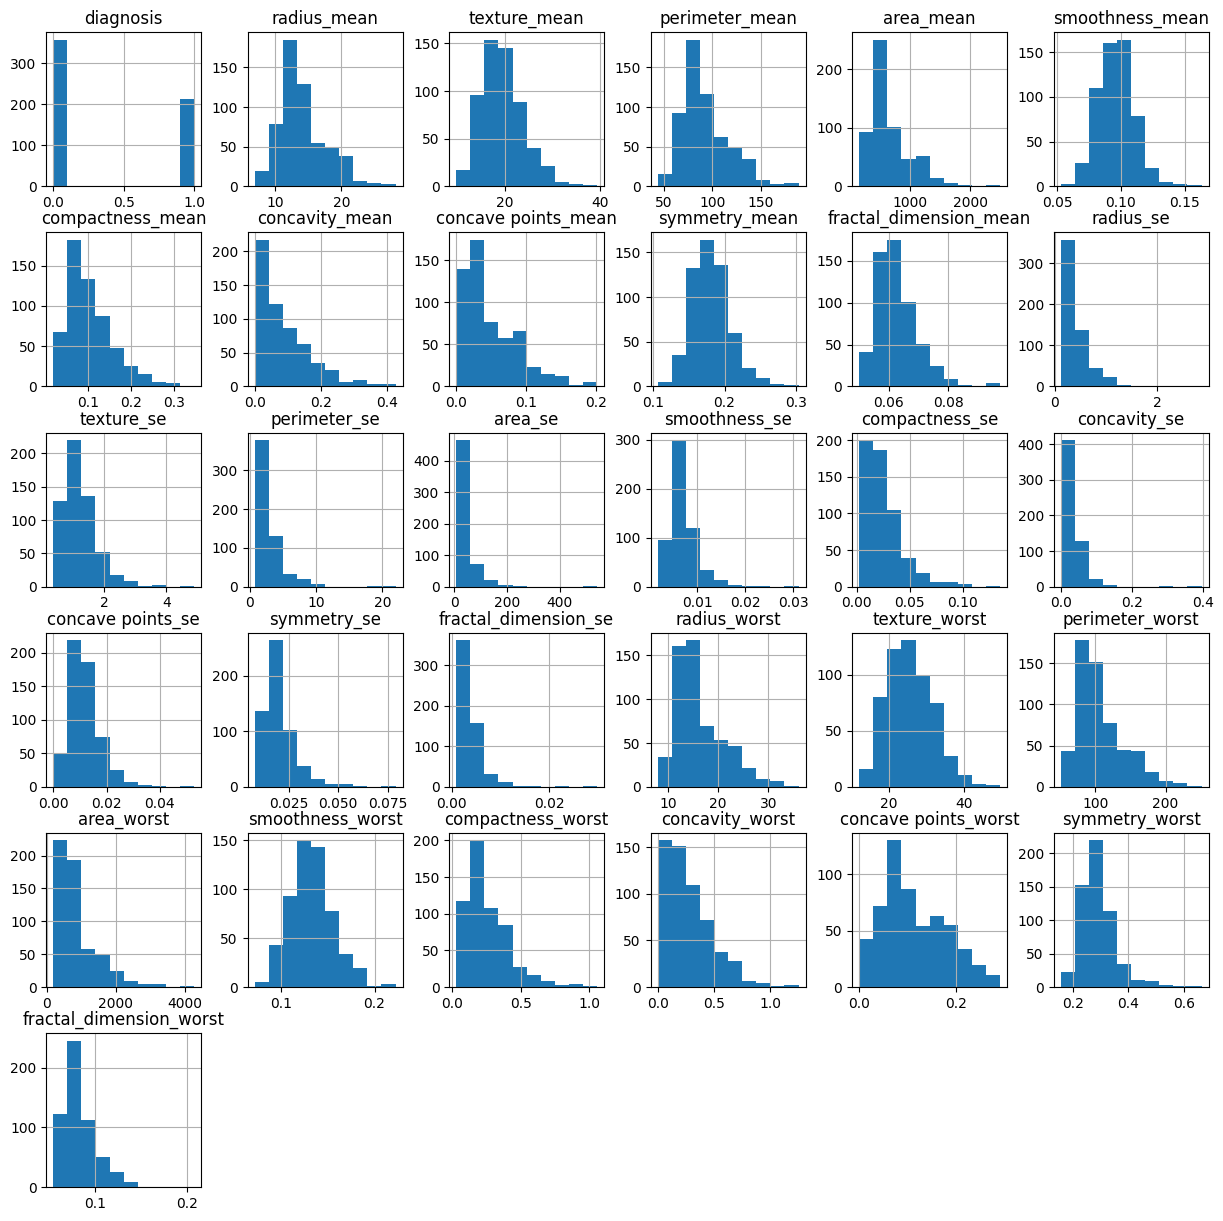

In [130]:
df.hist(figsize=(15,15))
plt.show()

<Axes: >

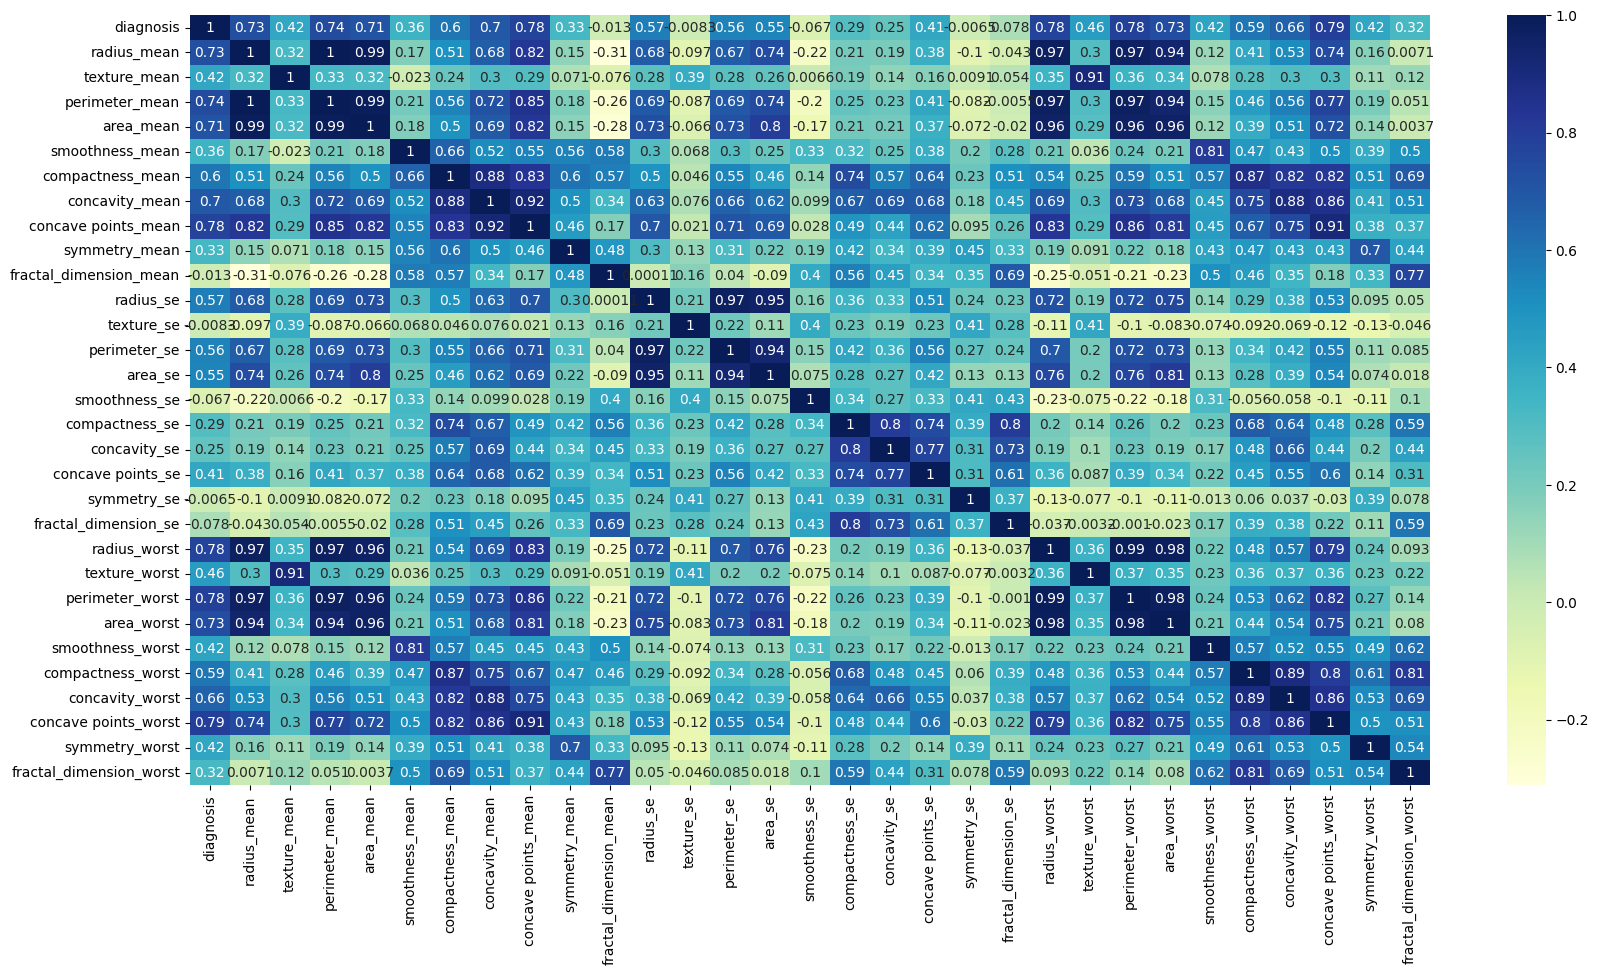

In [179]:
# Compute the correlation matrix and plot the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="YlGnBu")

# Data Preprocessing & Feature Engineering

Although the data has undergone initial cleaning, we will enhance the dataset by performing further preprocessing. This includes handling missing values and removing duplicates. We will then split the data into training and test sets, followed by normalizing both sets.

In the **Model Training** section, we will choose the most relevant features based on their correlation.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression for Choosing Features

We will now use Linear Regression to help us with our feature engineering. There are about 30 features and we want to bring it down to atleast 10.

# Feature Scaling
Many machine learning algorithms perform better when numerical features are on a similar scale.
Standardization helps improve model convergence and performance, especially for algorithms like logistic regression and SVMs

In [185]:
# This will store the R-squared scores for each feature
r2_scores = {}

# Loop through each feature (except 'diagnosis') to perform linear regression
for feature in df.drop(columns=["diagnosis"]).columns[:-1]:
    model = LinearRegression()
    
    model.fit(df[[feature]], df['diagnosis'])
    
    r2_scores[feature] = model.score(df[[feature]], df['diagnosis'])

# Sort the R-squared scores in descending order
sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 features based on R-squared score
top_r2 = sorted_r2_scores[:20]

# Extract the feature names and their corresponding R-squared scores
features = [item[0] for item in sorted_r2_scores]
scores = [item[1] for item in sorted_r2_scores]

# Extract the top features and their R-squared scores
top_features = [item[0] for item in top_r2]
top_scores = [item[1] for item in top_r2]

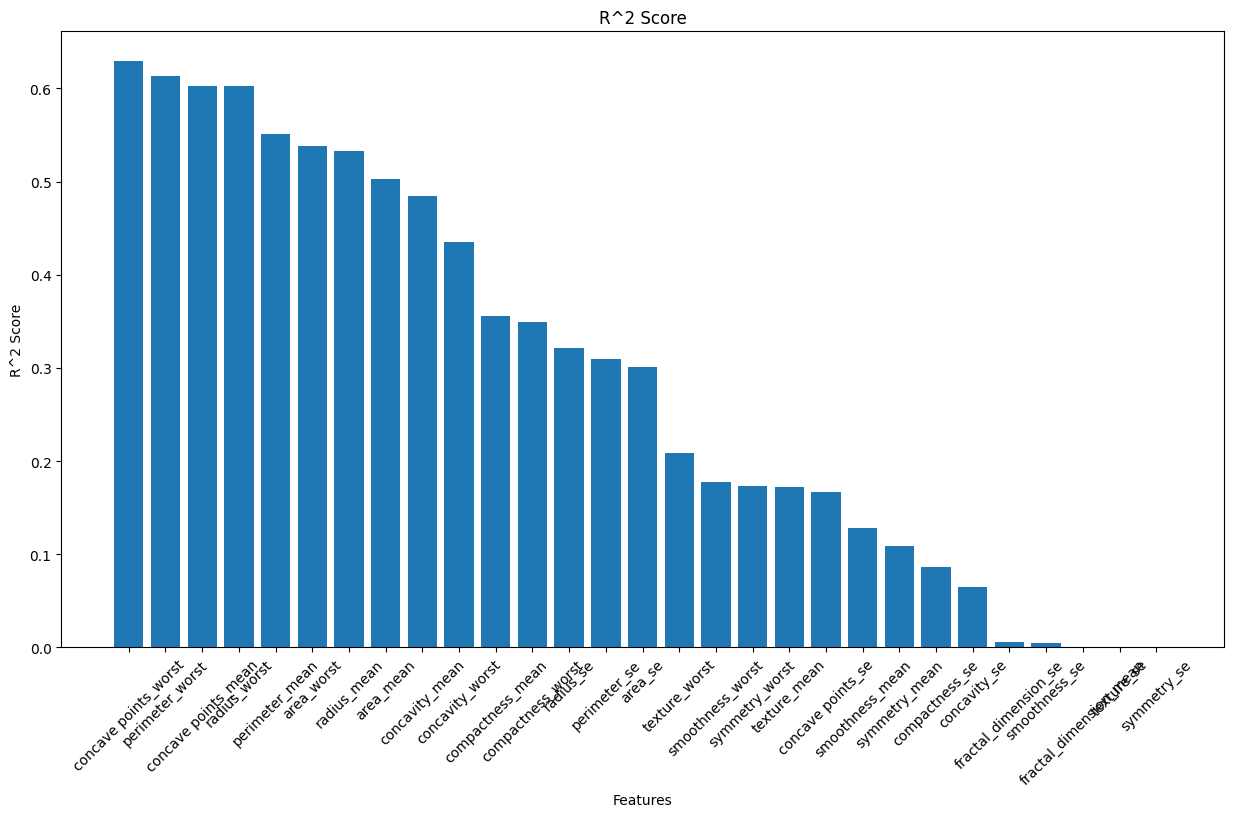

In [190]:
# Plot all R^2 scores
plt.figure(figsize=(15,8))
plt.bar(features, scores)
plt.xlabel('Features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score')
plt.xticks(rotation=45)
plt.show()

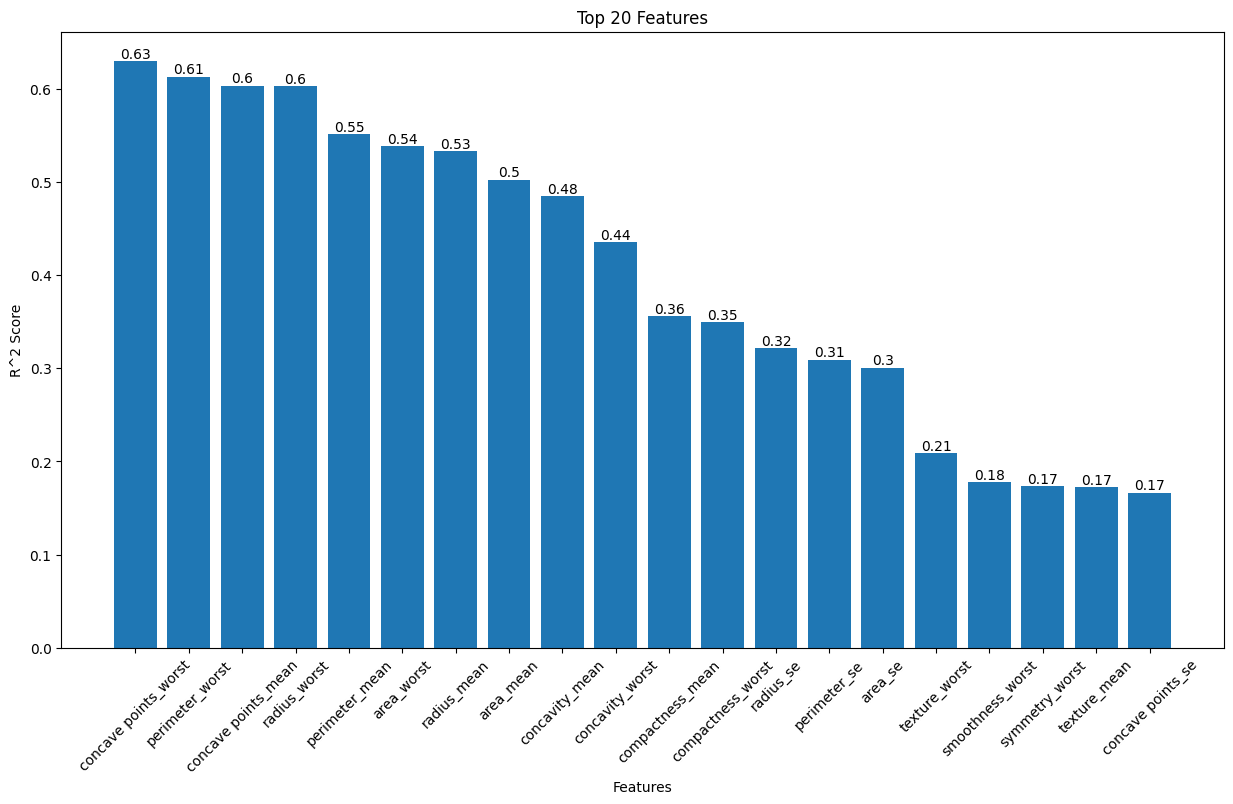

In [192]:
# Plot the top R^2 scores
plt.figure(figsize=(15,8))
plt.bar(top_features, top_scores)
plt.xlabel('Features')
plt.ylabel('R^2 Score')
plt.title('Top 20 Features')
plt.xticks(rotation=45)

# Add the score to each bar
for i, score in enumerate(top_scores):
    plt.text(i, score, str(round(score, 2)), ha='center', va='bottom')

plt.show()

# Model Building

## Train-Test Split  
Splitting the data into training and testing sets allows us to evaluate the model's performance on unseen data.  

### Parameters:  
- **test_size=0.2** → Allocates 20% of the data for testing.  
- **random_state=7** → Ensures reproducibility of results.  

In [184]:
#Use only the top features as features for the new model
X = df[top_features]
y = df['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression  

Logistic Regression is a simple yet effective baseline model for classification problems.  
- **max_iter=1000** → Increases the maximum number of iterations to ensure convergence.   
- The model is trained on the training data using `fit()`.  
- `predict()` generates predictions on the test data.  

In [193]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [194]:
#These are helper function that are used for creating plots.
def make_confusion_matrix(y_true, y_pred, model_name, labels=None):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def evaluate_model(model, X_test, y_test, model_name, labels=None):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, labels=labels))
    
    make_confusion_matrix(y_test, y_pred, model_name, labels=labels)
    
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=labels[1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

Model: Logistic Regression
Accuracy: 0.9737
ROC AUC: 0.9990
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



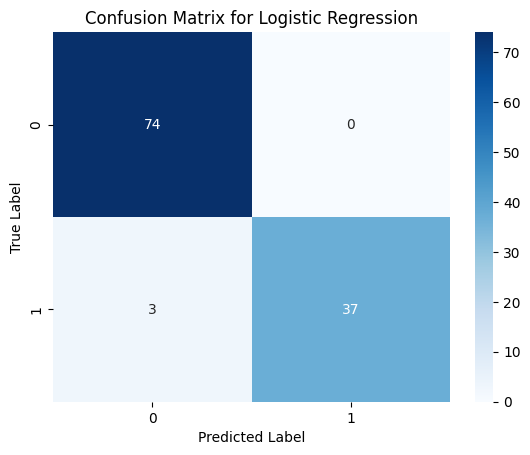

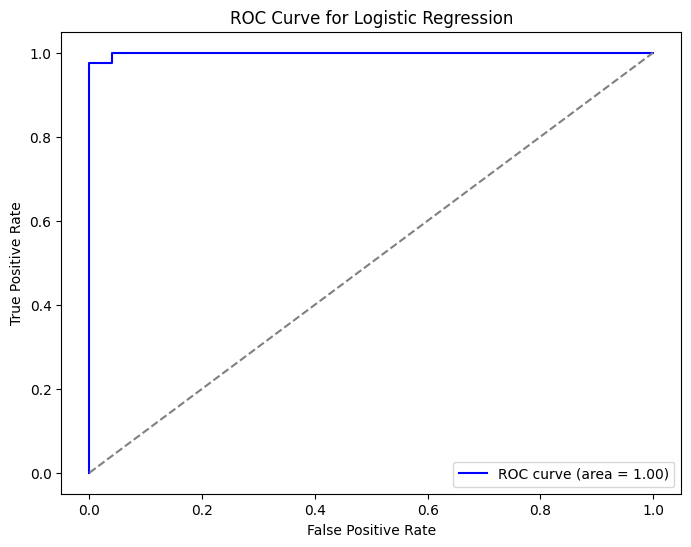

Model: Decision Tree
Accuracy: 0.9035
ROC AUC: 0.8912
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        74
           1       0.87      0.85      0.86        40

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



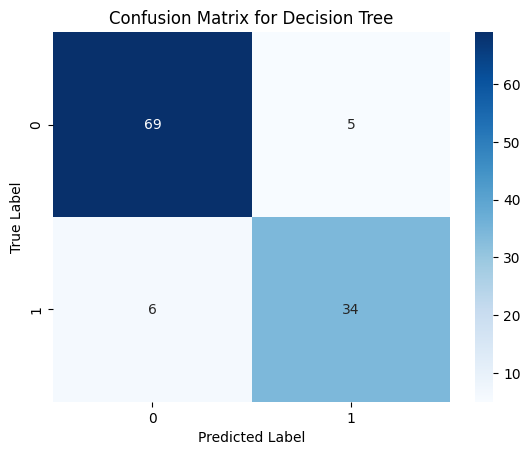

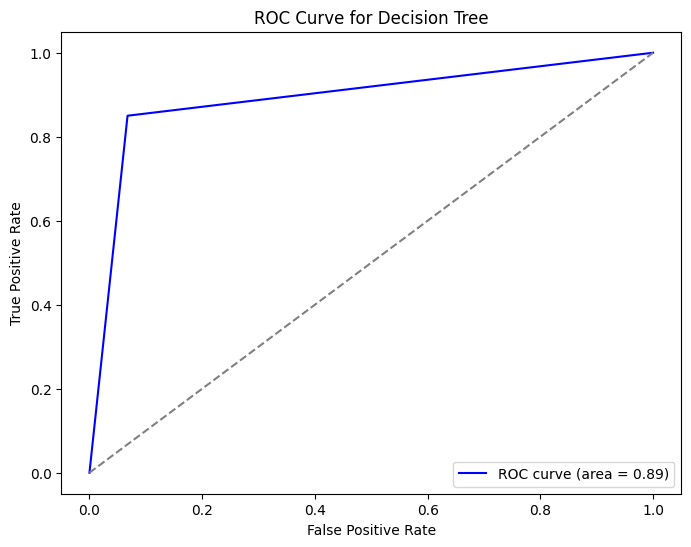

Model: Random Forest
Accuracy: 0.9825
ROC AUC: 0.9997
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



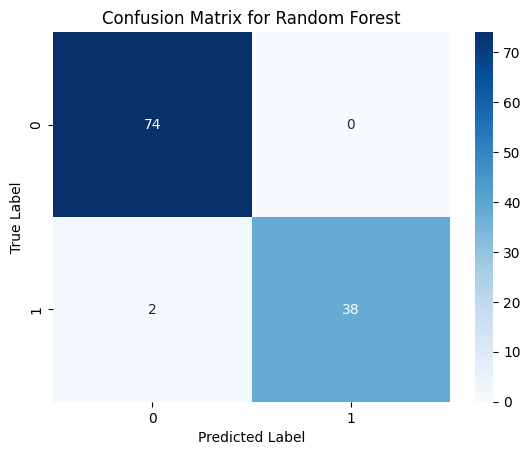

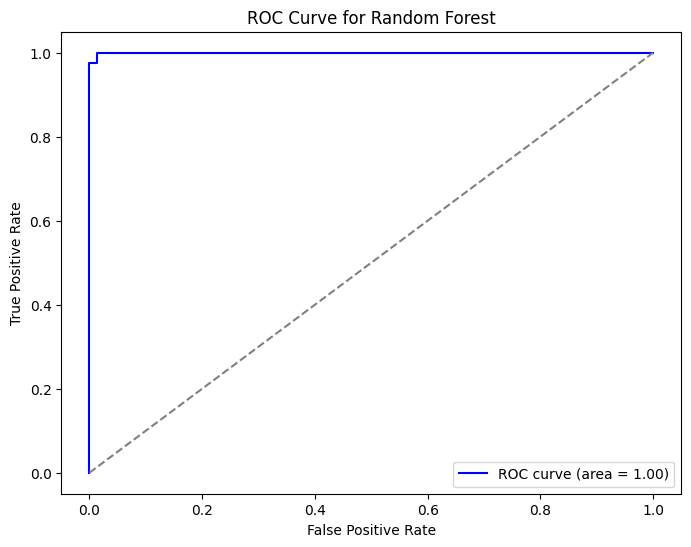

Model: Support Vector Machine
Accuracy: 0.9912
ROC AUC: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



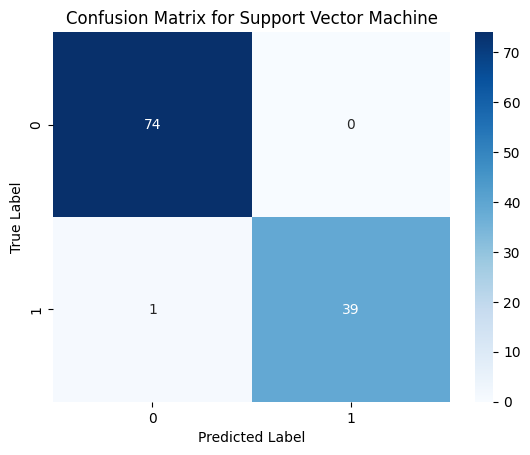

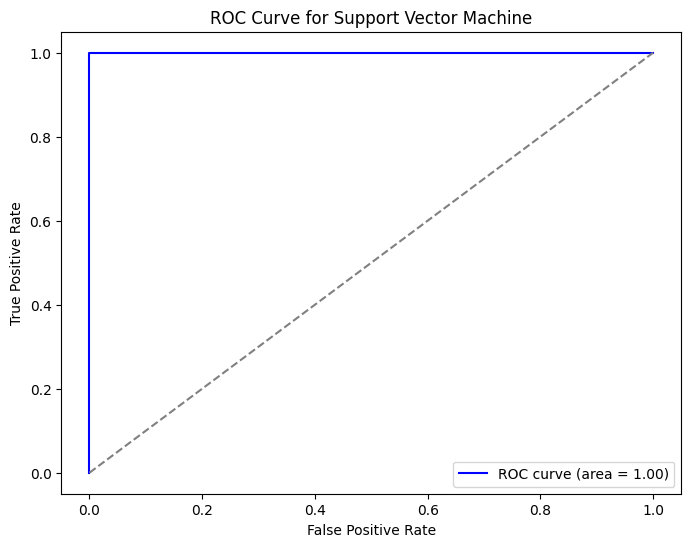

In [195]:
# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, 'Logistic Regression', labels=y_test.unique())

# 2. Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
evaluate_model(dec_tree, X_test, y_test, 'Decision Tree', labels=y_test.unique())

# 3. Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
evaluate_model(rand_forest, X_test, y_test, 'Random Forest', labels=y_test.unique())

# 4. Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_test, y_test, 'Support Vector Machine', labels=y_test.unique())

In [196]:
# Summarize the performance of each model
model_performance = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, log_reg.predict(X_test)),
        'ROC AUC': roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, dec_tree.predict(X_test)),
        'ROC AUC': roc_auc_score(y_test, dec_tree.predict_proba(X_test)[:, 1])
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, rand_forest.predict(X_test)),
        'ROC AUC': roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, svm_model.predict(X_test)),
        'ROC AUC': roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
    }
}

performance_df = pd.DataFrame(model_performance).T
performance_df

,Accuracy,ROC AUC
Logistic Regression,0.973684,0.998986
Decision Tree,0.903509,0.891216
Random Forest,0.982456,0.999662
SVM,0.991228,1.000000


## Model Performance Summary  
In this notebook, we trained and evaluated several machine learning models for tumor classification. Below is a summary of their performance:  

- **Logistic Regression**: Achieved an accuracy of **97.36%** and ROC AUC of **99.89%**. 
- **Decision Tree Classifier**: Reached an accuracy of **90.35%** and ROC AUC of **89.12%**. 
- **Random Forest Classifier**: Reached an accuracy of (**98.24%**) and ROC AUC of **99.96%**. 
- **Support Vector Machine (SVM)**: The best-performing model in terms of accuracy (**99.12%**) and ROC AUC of **100%**. Its high accuracy and ROC make it a strong choice for classification.  


## Future Considerations  
The success of these models in predicting tumor malignancy with high accuracy is a promising advancement. However, further improvements can be explored:  
- **Combining machine learning with computer vision** for automated image-based diagnosis.  
- **Integrating additional medical features** for better predictive power. 